In [2]:
# Import Libraries
import pandas as pd
import numpy as np 
import glob
import os
from os.path import isfile, join
import soundfile as sf 
import sys
import librosa 
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import scipy.io.wavfile
from scipy.fftpack import dct
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [3]:
# Folder Paths
RavdessData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS/audio_speech_actors_01-24/"

In [4]:
# Extract Data
fileEmotion = []
filePath = []
RavdessList = os.listdir(RavdessData)
for dir in RavdessList: # extract files for each actor
    actor = os.listdir(RavdessData + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        fileEmotion.append(int(part[2]))
        filePath.append(RavdessData + dir + '/' + file)
print("Dataset is loaded")
# dataframe for emotion of files
dfEmotion = pd.DataFrame(fileEmotion, columns=['Emotions'])

# dataframe for path of files
dfPath = pd.DataFrame(filePath, columns=['Path'])
dfRavdess = pd.concat([dfEmotion, dfPath], axis=1)
dfPath = pd.concat([dfRavdess], axis = 0)
dfPath.to_csv("data_path.csv",index=False)
dfPath.head()

# renaming integers to emotions
dfRavdess.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8: 'surprise'}, inplace=True)
dfRavdess.head()

Dataset is loaded


,Emotions,Path
0,neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1,neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
2,neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
3,neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
4,calm,C:/Users/Lenovo/Documents/3rd Year Project/Dat...


1440
C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav


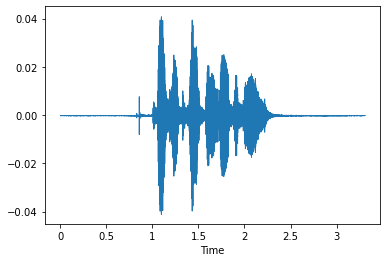

In [5]:
# Print wavelet
signal, sr = librosa.load(dfPath.Path[0])
librosa.display.waveshow(signal,sr=sr)
print(len(dfPath.Path))
print(dfPath.Path[0])

In [5]:
# Obtain file durations
fileDuration = []
for path in dfPath.Path: 
    signal, sr = librosa.load(path)
    fileDuration.append(len(signal))
    #current_directory = os.RavdessData
#librosa.display.waveshow(signal,sr=sr)
print(len(fileDuration))

1440


In [6]:
# Obtain label, path, and duration for the four emotions
fileDuration = 0
fileDuration = []
label = 0
label = []
path1 = 0
path1 = []
count = 0
for i in range(len(dfRavdess)):
    if dfRavdess['Emotions'][i] == 'neutral':
        count = count +1
        label.append(dfRavdess['Emotions'][i])
        path1.append(dfRavdess['Path'][i])
        signal, sr = librosa.load(dfRavdess['Path'][i])
        fileDuration.append(len(signal))
        
    if dfRavdess['Emotions'][i] == 'happy':
        count = count +1
        label.append(dfRavdess['Emotions'][i])
        path1.append(dfRavdess['Path'][i])
        signal, sr = librosa.load(dfRavdess['Path'][i])
        fileDuration.append(len(signal))
        
    if dfRavdess['Emotions'][i] == 'sad':
        count = count +1
        label.append(dfRavdess['Emotions'][i])
        path1.append(dfRavdess['Path'][i])
        signal, sr = librosa.load(dfRavdess['Path'][i])
        fileDuration.append(len(signal))
        
    if dfRavdess['Emotions'][i] == 'angry':
        count = count +1
        label.append(dfRavdess['Emotions'][i])
        path1.append(dfRavdess['Path'][i])
        signal, sr = librosa.load(dfRavdess['Path'][i])
        fileDuration.append(len(signal))
        
    
print(count)

672


In [7]:
# Create dataframe
dfRavdess_shortened = pd.DataFrame(
    {'Label': label,
     'Path': path1,
     'Duration': fileDuration
    })
dfRavdess_shortened.Label.replace({'angry':'Anger','happy':'Happiness', 'sad':'Sadness', 'neutral':'Neutral'}, inplace=True)
dfRavdess_shortened

,Label,Path,Duration
0,Neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,72838
1,Neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,73574
2,Neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,72102
3,Neutral,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,69895
4,Happiness,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,76517
...,...,...,...
667,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,92703
668,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,96382
669,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,96382
670,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...,91967


Happiness    192
Sadness      192
Anger        192
Neutral       96
Name: Label, dtype: int64

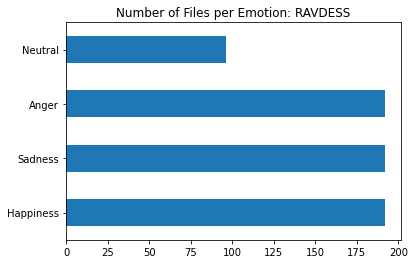

In [8]:
# Calculate distribution of emotions
distribution = dfRavdess_shortened['Label'].value_counts().plot(kind='barh', title='Number of Files per Emotion: RAVDESS')
dfRavdess_shortened['Label'].value_counts()


In [9]:
# Compute distribution of file lengths
avgDuration = sum(dfRavdess_shortened['Duration'])/len(dfRavdess_shortened['Duration'])
minDuration = min(dfRavdess_shortened['Duration'])
maxDuration = max(dfRavdess_shortened['Duration'])
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)

dfRavdess_shortened["Duration_sec"] = dfRavdess_shortened['Duration']/sr 

3.701637849584278
3.069750566893424
5.105124716553288


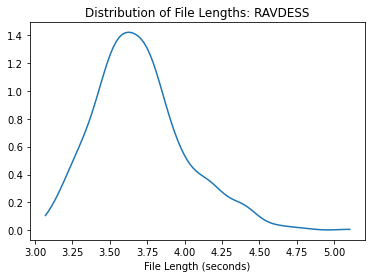

75.0% of files have a length shorter than 3.84 seconds.


In [10]:
# Plot distribution of file lengths
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdf = gaussian_kde(dfRavdess_shortened['Duration_sec'])#, bins = 30)#.plot(kind='kde', title="Distribution of File Lengths: EmoDB")
x = np.linspace(dfRavdess_shortened['Duration_sec'].min(), dfRavdess_shortened['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: RAVDESS")
plt.show()

cdf = dfRavdess_shortened['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.75
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")
# 5 seconds is good to cut

In [16]:
# Baseline Pre-Processing Crop/Zero-Pad
setfileDuration = 3.84*sr # set file duration to 4 seconds
newlabel = []
for path in dfRavdess_shortened.Path:
    savePath = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Baseline/'+ path[85:93]+"_"+path[94:]
    signal, sr = librosa.load(path)
    fileDuration = len(signal)
    if fileDuration != setfileDuration :
            # crop soundwave 
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
    else:
        soundfile.write(savePath, signal, sr)
    newlabel.append(path[101])
        
#import os
#label2 = []
#newPath = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Shortened'
#for filename in os.listdir(newPath):
#    label2.append(filename[13])
    
#len(label2)    

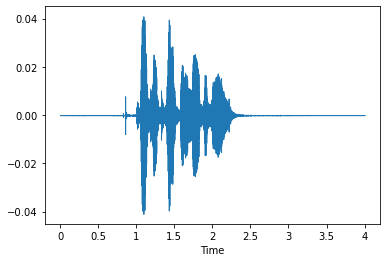

In [58]:
# Print wavefile 
Path = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Baseline/Actor_01_03-01-01-01-01-01-01.wav'
signal, sr = librosa.load(Path)
librosa.display.waveshow(signal, sr=sr)

In [3]:
# Extract MFCC features
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = 'Dataset/RAVDESS_Baseline/'
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(int(x[16]))
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

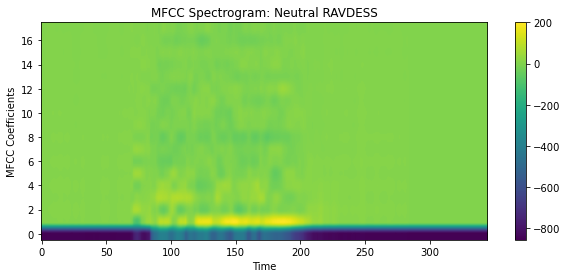

In [21]:
# Plot Neutral MFCC Spectrogram
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Display the first MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[0], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Neutral RAVDESS')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

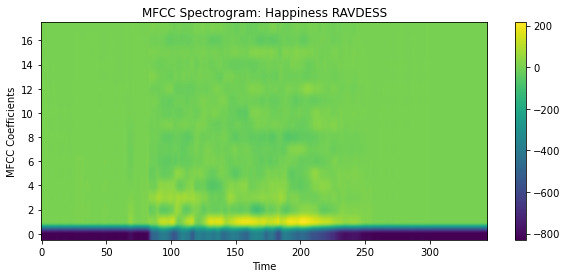

In [20]:
# Display Happy MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[4], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Happiness RAVDESS')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

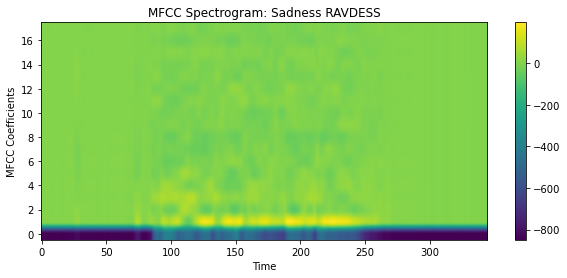

In [19]:
# Display Sadness MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[12], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Sadness RAVDESS')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

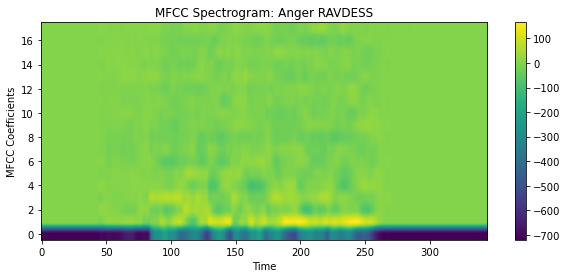

In [18]:
# Display Anger MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[21], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Anger RAVDESS')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [4]:
data = np.array(data)
data.shape

(672, 18, 345)

In [5]:
# Expand data to fit CNN
X = np.expand_dims(data, axis=3)
X.shape

(672, 18, 345, 1)

In [6]:
# Relabel emotions numerically
label_new = []
for i in range(len(label)):
    if label[i] == 1: #Neutral
        x=3
    elif label[i] == 3: #Happy
        x=0
    elif label[i] == 4: #S
        x=1
    elif label[i] == 5: #Angry
        x = 2
    label_new.append(x)


In [7]:
# Split data for training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [8]:
# Convert data
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(Y_train.shape)

(537,)


In [9]:
# This model gives 68% - 82%, 20 epochs, update 78% with 30 mfcc
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 345, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 345, 64)       640       
                                                                 
 batch_normalization (BatchN  (None, 18, 345, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 345, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 18, 345, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 172, 64)       0         
 )                                                               
                                                        

In [10]:
# This is an old version of the CNN 
#model = Sequential()

# First Convolutional Layer with Batch Normalization and Dropout
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(20, 345, 1)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# Second Convolutional Layer with Batch Normalization and Dropout
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

# Flattening the Output and Adding Dense Layers with Batch Normalization and Dropout
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(units=4, activation='softmax'))
#model.summary()

In [11]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 5
count = 0
#Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
Epoch_list = [10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

Epoch 1/10
17/17 [==============================] - 146s 7s/step - loss: 1.6876 - accuracy: 0.4655 - val_loss: 53.4089 - val_accuracy: 0.2667
Epoch 2/10
17/17 [==============================] - 121s 7s/step - loss: 0.7397 - accuracy: 0.7114 - val_loss: 29.9578 - val_accuracy: 0.2667
Epoch 3/10
17/17 [==============================] - 126s 7s/step - loss: 0.5492 - accuracy: 0.7989 - val_loss: 14.1329 - val_accuracy: 0.2667
Epoch 4/10
17/17 [==============================] - 114s 7s/step - loss: 0.3717 - accuracy: 0.8529 - val_loss: 4.7068 - val_accuracy: 0.3778
Epoch 5/10
17/17 [==============================] - 116s 7s/step - loss: 0.2623 - accuracy: 0.9088 - val_loss: 1.3733 - val_accuracy: 0.5852
Epoch 6/10
17/17 [==============================] - 113s 7s/step - loss: 0.2519 - accuracy: 0.9236 - val_loss: 1.6161 - val_accuracy: 0.6074
Epoch 7/10
17/17 [==============================] - 115s 7s/step - loss: 0.1554 - accuracy: 0.9441 - val_loss: 1.6589 - val_accuracy: 0.5778
Epoch 8/10

17/17 [==============================] - 153s 9s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.8370
Epoch 18/18
5/5 [==============================] - 9s 2s/step - loss: 0.5466 - accuracy: 0.8519
4
Epoch 1/20
17/17 [==============================] - 154s 9s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5115 - val_accuracy: 0.8593
Epoch 2/20
17/17 [==============================] - 156s 9s/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.4699 - val_accuracy: 0.8667
Epoch 3/20
17/17 [==============================] - 154s 9s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5335 - val_accuracy: 0.8444
Epoch 4/20
17/17 [==============================] - 155s 9s/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.6591 - val_accuracy: 0.8148
Epoch 5/20
17/17 [==============================] - 155s 9s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8339 - val_accuracy: 0.8148
Epoch 6/20
17/17 [==============================] - 154s 9s/step - 

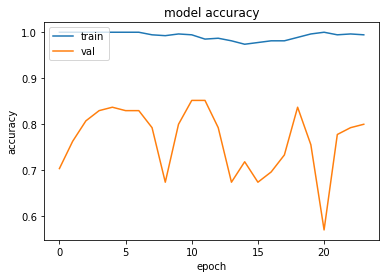

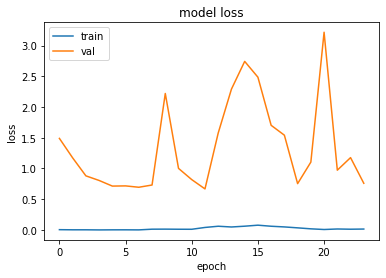

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

x_train = X_train
y_train = Y_train
x_test = X_test
y_test = Y_test
   
# Fit the model on training data
#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


5/5 [==============================] - 5s 853ms/step - loss: 0.6375 - accuracy: 0.8370
Accuracy of our model on test data :  83.70370268821716 %


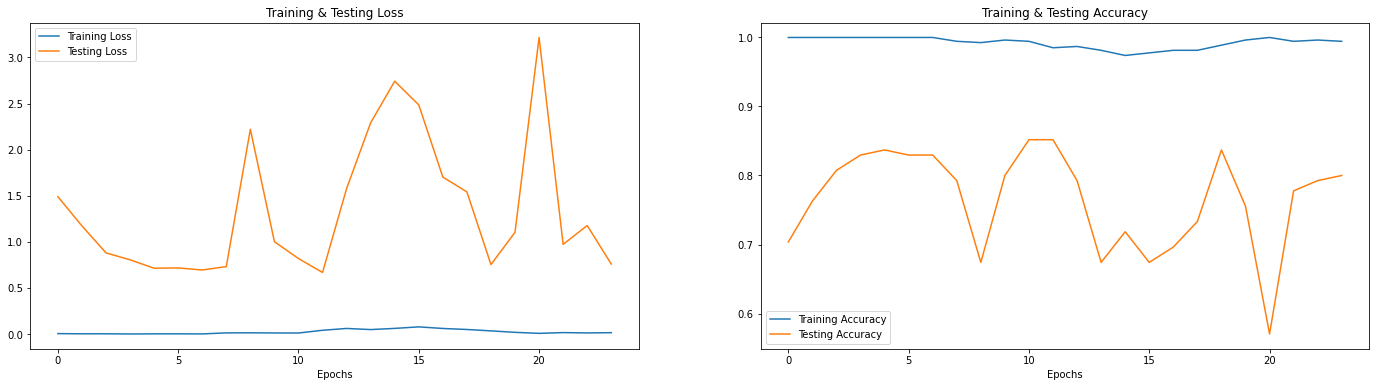

In [47]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

epochs = [i for i in range(24)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(24,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [51]:
y_test_new.shape

(154,)

In [46]:
y_test_new = Y_test
for i in range(len(y_test_new)):
    if y_test_new[i] == 5:
        y_test_new[i] = 0
    if y_test_new[i] == 6:
        y_test_new[i] = 1
    if y_test_new[i] == 7:
        y_test_new[i] = 2
    if y_test_new[i] == 8:
        y_test_new[i] = 3

print(y_test_new)

[3 2 0 3 3 2 3 0 1 0 3 0 2 1 2 1 3 1 1 2 2 2 0 3 1 1 1 3 3 0 3 0 0 1 0 0 1
 3 0 1 3 0 2 1 1 3 1 0 1 1 3 0 3 1 3 2 0 3 3 2 0 3 0 3 3 2 1 2 1 0 0 0 0 2
 0 2 1 0 3 2 2 1 1 3 3 2 1 3 3 1 0 0 2 3 0 2 2 1 2 3 0 0 0 3 1 2 3 3 0 2 2
 1 0 2 3 1 0 0 1 3 3 2 0 1 0 2 2 2 0 0 0 1 1 2 3 3 2 3 1 3 2 0 2 0 1 2 3 2
 0 3 2 1 1 0]


5/5 [==============================] - 3s 581ms/step


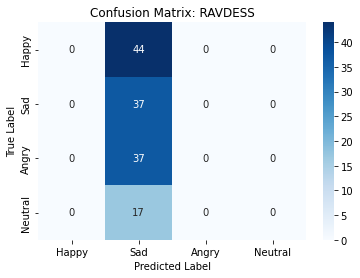

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# assuming y_true and y_pred are numpy arrays of the true and predicted labels
# y_true and y_pred should have the same length and correspond to the same samples
import numpy as np

# assuming x_test and y_test are the test set inputs and labels
# and model is your trained CNN model

# make predictions on the test set
y_pred = model.predict(x_test)

# define y_true as the one-hot encoded version of the test labels
y_true = np.zeros((len(y_test), 4)) # 4 is the number of emotions being classified
y_true[np.arange(len(y_test)), y_test] = 1
#y_true = y_test

# convert y_pred from probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# define y_pred as the one-hot encoded version of the predicted labels
y_pred = np.zeros((len(predicted_labels), 4)) # 4 is the number of emotions being classified
y_pred[np.arange(len(predicted_labels)), predicted_labels] = 1


cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
labels = ['Happy', 'Sad', 'Angry', 'Neutral'] # replace with your own emotion labels

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: RAVDESS')

# show the plot
plt.show()
